In [11]:
import pandas as pd
import numpy as np


In [78]:
df = pd.read_csv("SMSSpamCollection - SMSSpamCollection.csv.csv")

In [14]:
describe = df.sample(8)
describe

,spam/not spam,Text
5061,ham,I think i am disturbing her da
4547,ham,Never try alone to take the weight of a tear t...
1345,ham,Were somewhere on Fredericksburg
2106,ham,I fetch yun or u fetch?
3393,ham,What r u cooking me for dinner?
3143,ham,Not planned yet :)going to join company on jan...
1814,ham,Yes we are chatting too.
2760,ham,"Can meh? Thgt some will clash... Really ah, i ..."


In [16]:
shape = df.shape 
shape

(5572, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   spam/not spam  5572 non-null   object
 1   Text           5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
### If their will be any unnamed column , we would have dropped them 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
df['spam/not spam'] = encoder.fit_transform(df['spam/not spam'])

In [26]:
df.head()

,spam/not spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
### IF their are any missing value or zero we use isnull().sum() and for duplicated value we use duplicated().sum()

In [28]:
df.isnull().sum()

spam/not spam    0
Text             0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df = df.drop_duplicates(keep='first')

In [34]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.shape

(5158, 2)

In [37]:
#### USE OF EDA. "Exploratory data analysis

In [40]:
df.head()

,spam/not spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df['spam/not spam'].value_counts()

spam/not spam
0    4516
1     642
Name: count, dtype: int64

In [43]:
import matplotlib.pyplot as plt

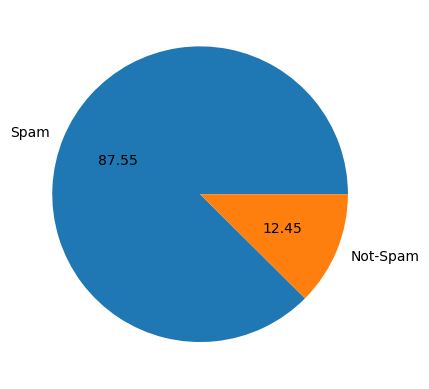

In [62]:
plt.pie(df['spam/not spam'].value_counts(), labels=['Spam','Not-Spam'], autopct = "%0.2f")
plt.show()

In [80]:
import nltk 
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/akshat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
df['Number_characters'] = df['Text'].apply(len)

In [82]:
df.head()

,spam/not spam,Text,Number_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [86]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/akshat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [90]:
df['tokenized_text'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [91]:
df.head()

,spam/not spam,Text,Number_characters,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [94]:
df['Text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5572, dtype: object

In [96]:
df['num_sentence']= df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [98]:
df.head(11)

,spam/not spam,Text,Number_characters,tokenized_text,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,39,4
6,ham,Even my brother is not like to speak with me. ...,77,18,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,spam,WINNER!! As a valued network customer you have...,157,32,5
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3


In [110]:
df[['Number_characters','tokenized_text','num_sentence']].describe()

,Number_characters,tokenized_text,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.454774,18.842426,2.006102
std,59.935964,13.851947,1.539977
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [146]:
df['spam/not spam'].value_counts()

spam/not spam
Not Spam    4825
Spam         747
Name: count, dtype: int64

In [183]:
df['spam/not spam'] = df['spam/not spam'].str.strip().astype(str).str.lower()

In [185]:
(df[df['spam/not spam']=='not spam'][['Number_characters', 'tokenized_text', 'num_sentence']].describe())

,Number_characters,tokenized_text,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [186]:
df[df['spam/not spam']=='spam'][['Number_characters', 'tokenized_text', 'num_sentence']].describe()

,Number_characters,tokenized_text,num_sentence
count,747.000000,747.000000,747.000000
mean,138.629183,27.993307,3.040161
std,28.856451,6.860440,1.548499
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Number_characters', ylabel='Count'>

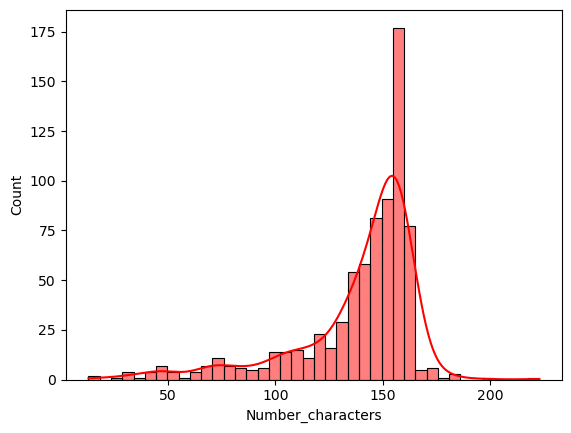

In [197]:
sns.histplot(df[df['spam/not spam'] == 'spam']['Number_characters'], kde=True, label='Spam', color='red')

<Axes: xlabel='Number_characters', ylabel='Count'>

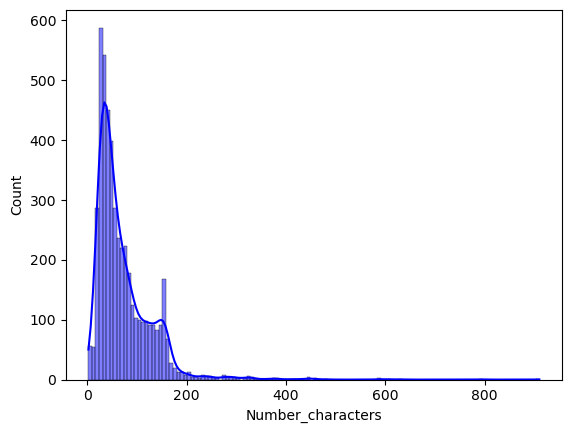

In [196]:
sns.histplot(df[df['spam/not spam'] == 'not spam']['Number_characters'], kde=True, label='Not Spam', color='blue')

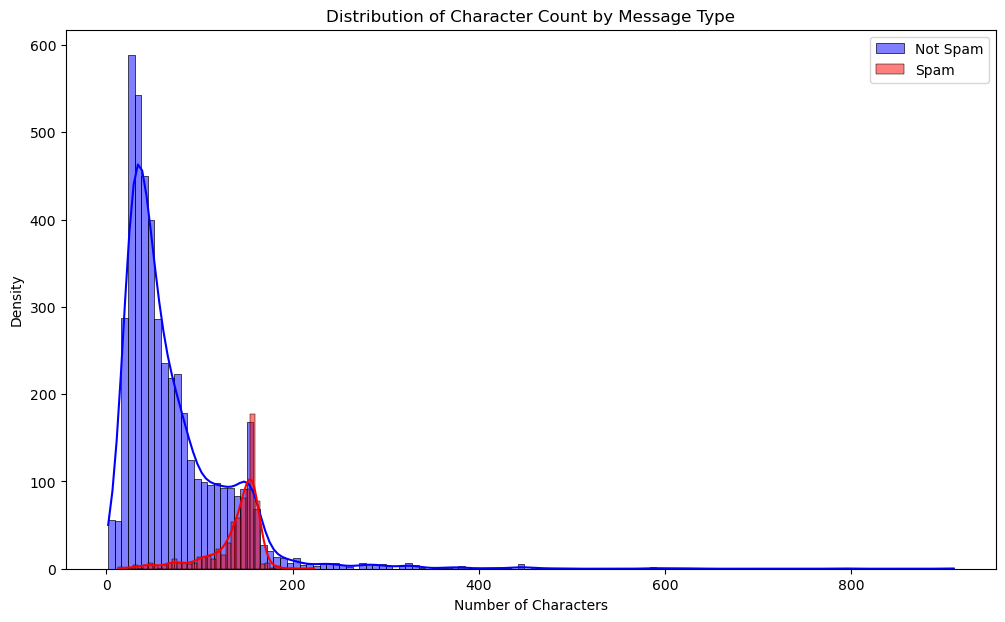

In [221]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df['spam/not spam'] == 'not spam']['Number_characters'], kde=True, label='Not Spam', color='blue')
sns.histplot(df[df['spam/not spam'] == 'spam']['Number_characters'], kde=True, label='Spam', color='red')
plt.title('Distribution of Character Count by Message Type')
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.legend()

Text(0, 0.5, 'Density')

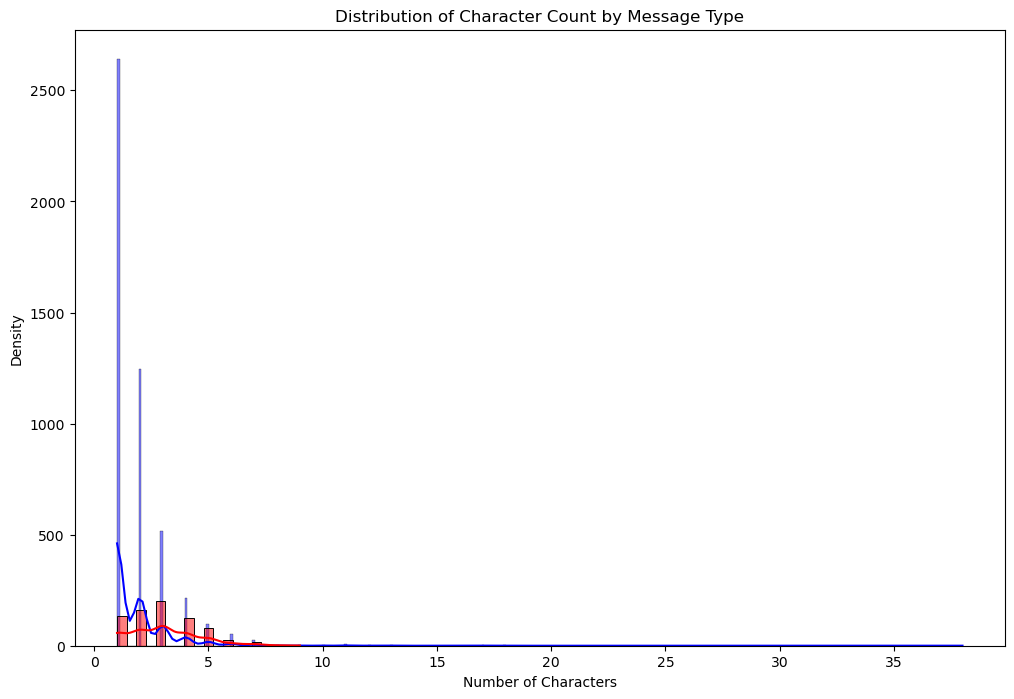

In [205]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['spam/not spam'] == 'not spam']['num_sentence'], kde=True, label='Not Spam', color='blue')
sns.histplot(df[df['spam/not spam'] == 'spam']['num_sentence'], kde=True, label='Spam', color='red')
plt.title('Distribution of Character Count by Message Type')
plt.xlabel('Number of Characters')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

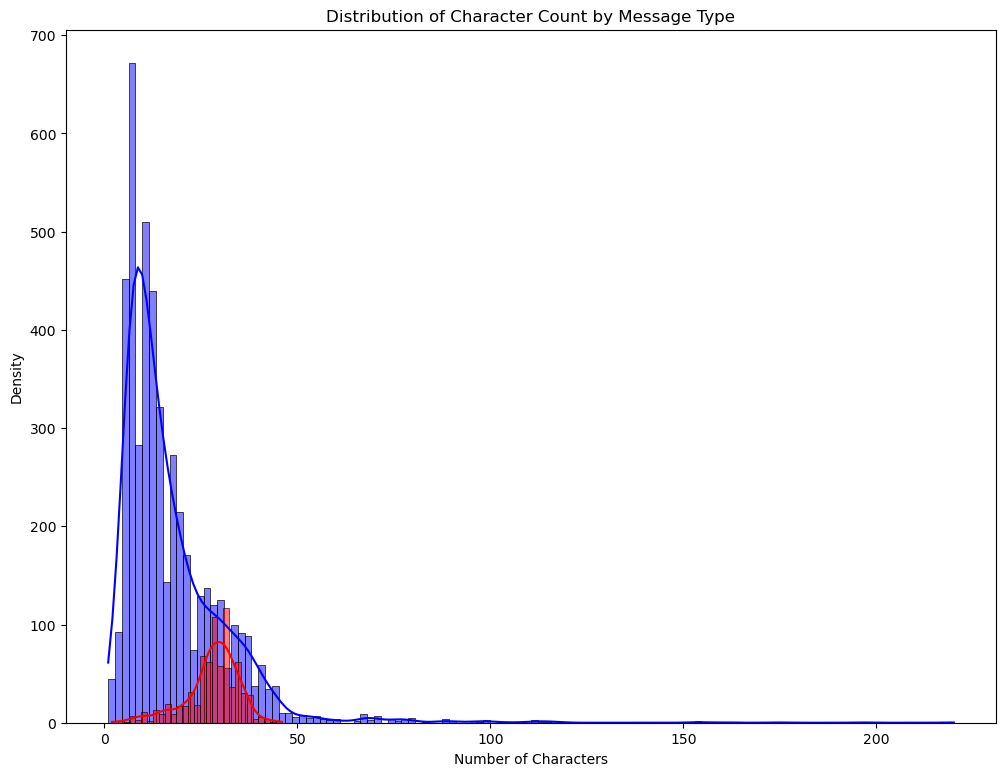

In [215]:
plt.figure(figsize=(12, 9))
sns.histplot(df[df['spam/not spam'] == 'not spam']['tokenized_text'], kde=True, label='Not Spam', color='blue')
sns.histplot(df[df['spam/not spam'] == 'spam']['tokenized_text'], kde=True, label='Spam', color='red')
plt.title('Distribution of Character Count by Message Type')
plt.xlabel('Number of Characters')
plt.ylabel('Density')

In [219]:
### To find the relationship bw the red and the blue we are going to use the pairplot

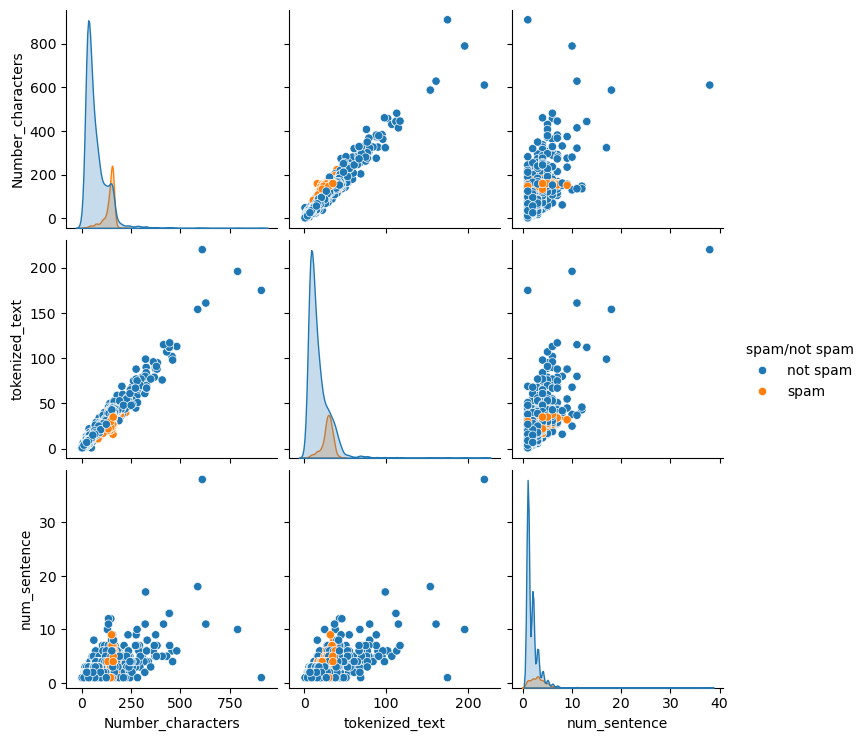

In [220]:
sns.pairplot(df, hue='spam/not spam')

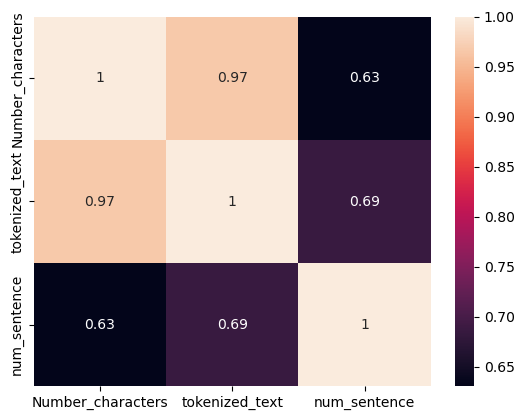

In [229]:
numeric_df = df[['Number_characters', 'tokenized_text', 'num_sentence']]
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [230]:
### Data Preprocessing
# lower case
# tokenise
# removal of special case and stop words and punctuation
# steming or lemitisation "ek he type ke word jinka meaning same hai wo same same banana"

In [272]:
d

In [298]:
def text_transformers(text):
    text = text.lower()
    text = nltk.word_tokenize(text)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [299]:
text_transforming("Hello")

['hello']

In [300]:
# Now we ll remove the special character

In [301]:
df['Text'][78]

'Does not operate after  &lt;#&gt;  or what'

In [302]:
import nltk
stppy = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [303]:
from nltk.corpus import stopwords

In [304]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [305]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'